Accuracy: 100.00%
Confusion Matrix:
[[13  0]
 [ 0  7]]


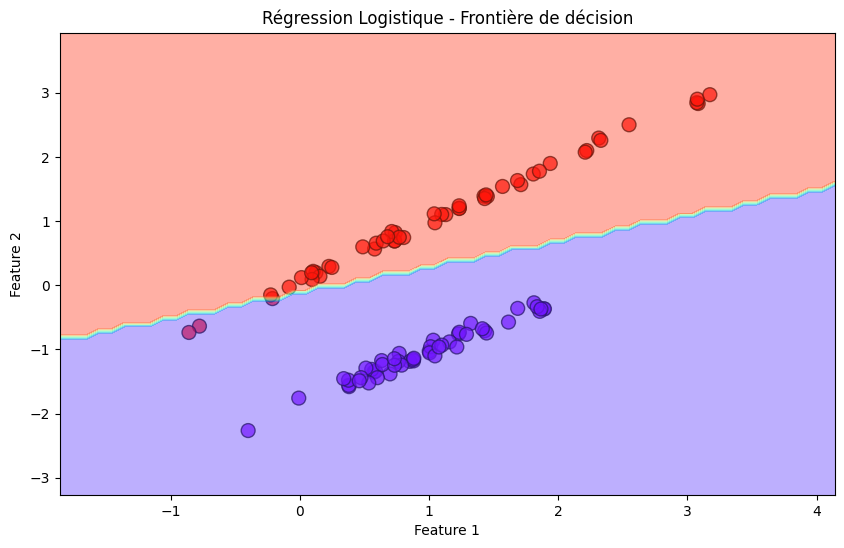

In [6]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Génération de données synthétiques
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_mat}")

# Tracer les données et la frontière de décision
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolors='k', s=100, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Créer une grille pour la frontière de décision
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))

# Prédire la classe pour chaque point de la grille
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Tracer la frontière de décision
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='rainbow')
plt.title('Régression Logistique - Frontière de décision')
plt.show()
